In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
colors = ['#F93822','#FDD20E']

Reading the dataset

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Replacing all the character objects with corresponding numerical values for easier learning

In [5]:
df['Sex'].replace(to_replace=['M','F'],value=[1,2],inplace=True)
df['ChestPainType'].replace(to_replace=['ATA','NAP','ASY','TA'],value=[1,2,3,4],inplace=True)
df['RestingECG'].replace(to_replace=['Normal','ST','LVH'],value=[1,2,3],inplace=True)
df['ExerciseAngina'].replace(to_replace=['N','Y'],value=[1,2],inplace=True)
df['ST_Slope'].replace(to_replace=['Up','Flat','Down'],value=[1,2,3],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [7]:
df.shape

(918, 12)

In [8]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,1.210240,2.452070,132.396514,198.799564,0.233115,1.603486,136.809368,1.404139,0.887364,1.638344,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,1.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,173.250000,0.000000,1.000000,120.000000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,1.000000,138.000000,1.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,2.000000,156.000000,2.000000,1.500000,2.000000,1.000000
max,77.000000,2.000000,4.000000,200.000000,603.000000,1.000000,3.000000,202.000000,2.000000,6.200000,3.000000,1.000000


In [9]:
len(df[df['Cholesterol']==0])

172

In [10]:
print(len(df[df['RestingBP']==0]))
df[df['RestingBP']==0]

1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,1,2,0,0,0,1,155,1,1.5,2,1


In [11]:
df = df.drop('Cholesterol',axis=1)

In [12]:
df.drop(4,inplace=True)

In [13]:
df.shape

(917, 11)

In [14]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Visualizing the data

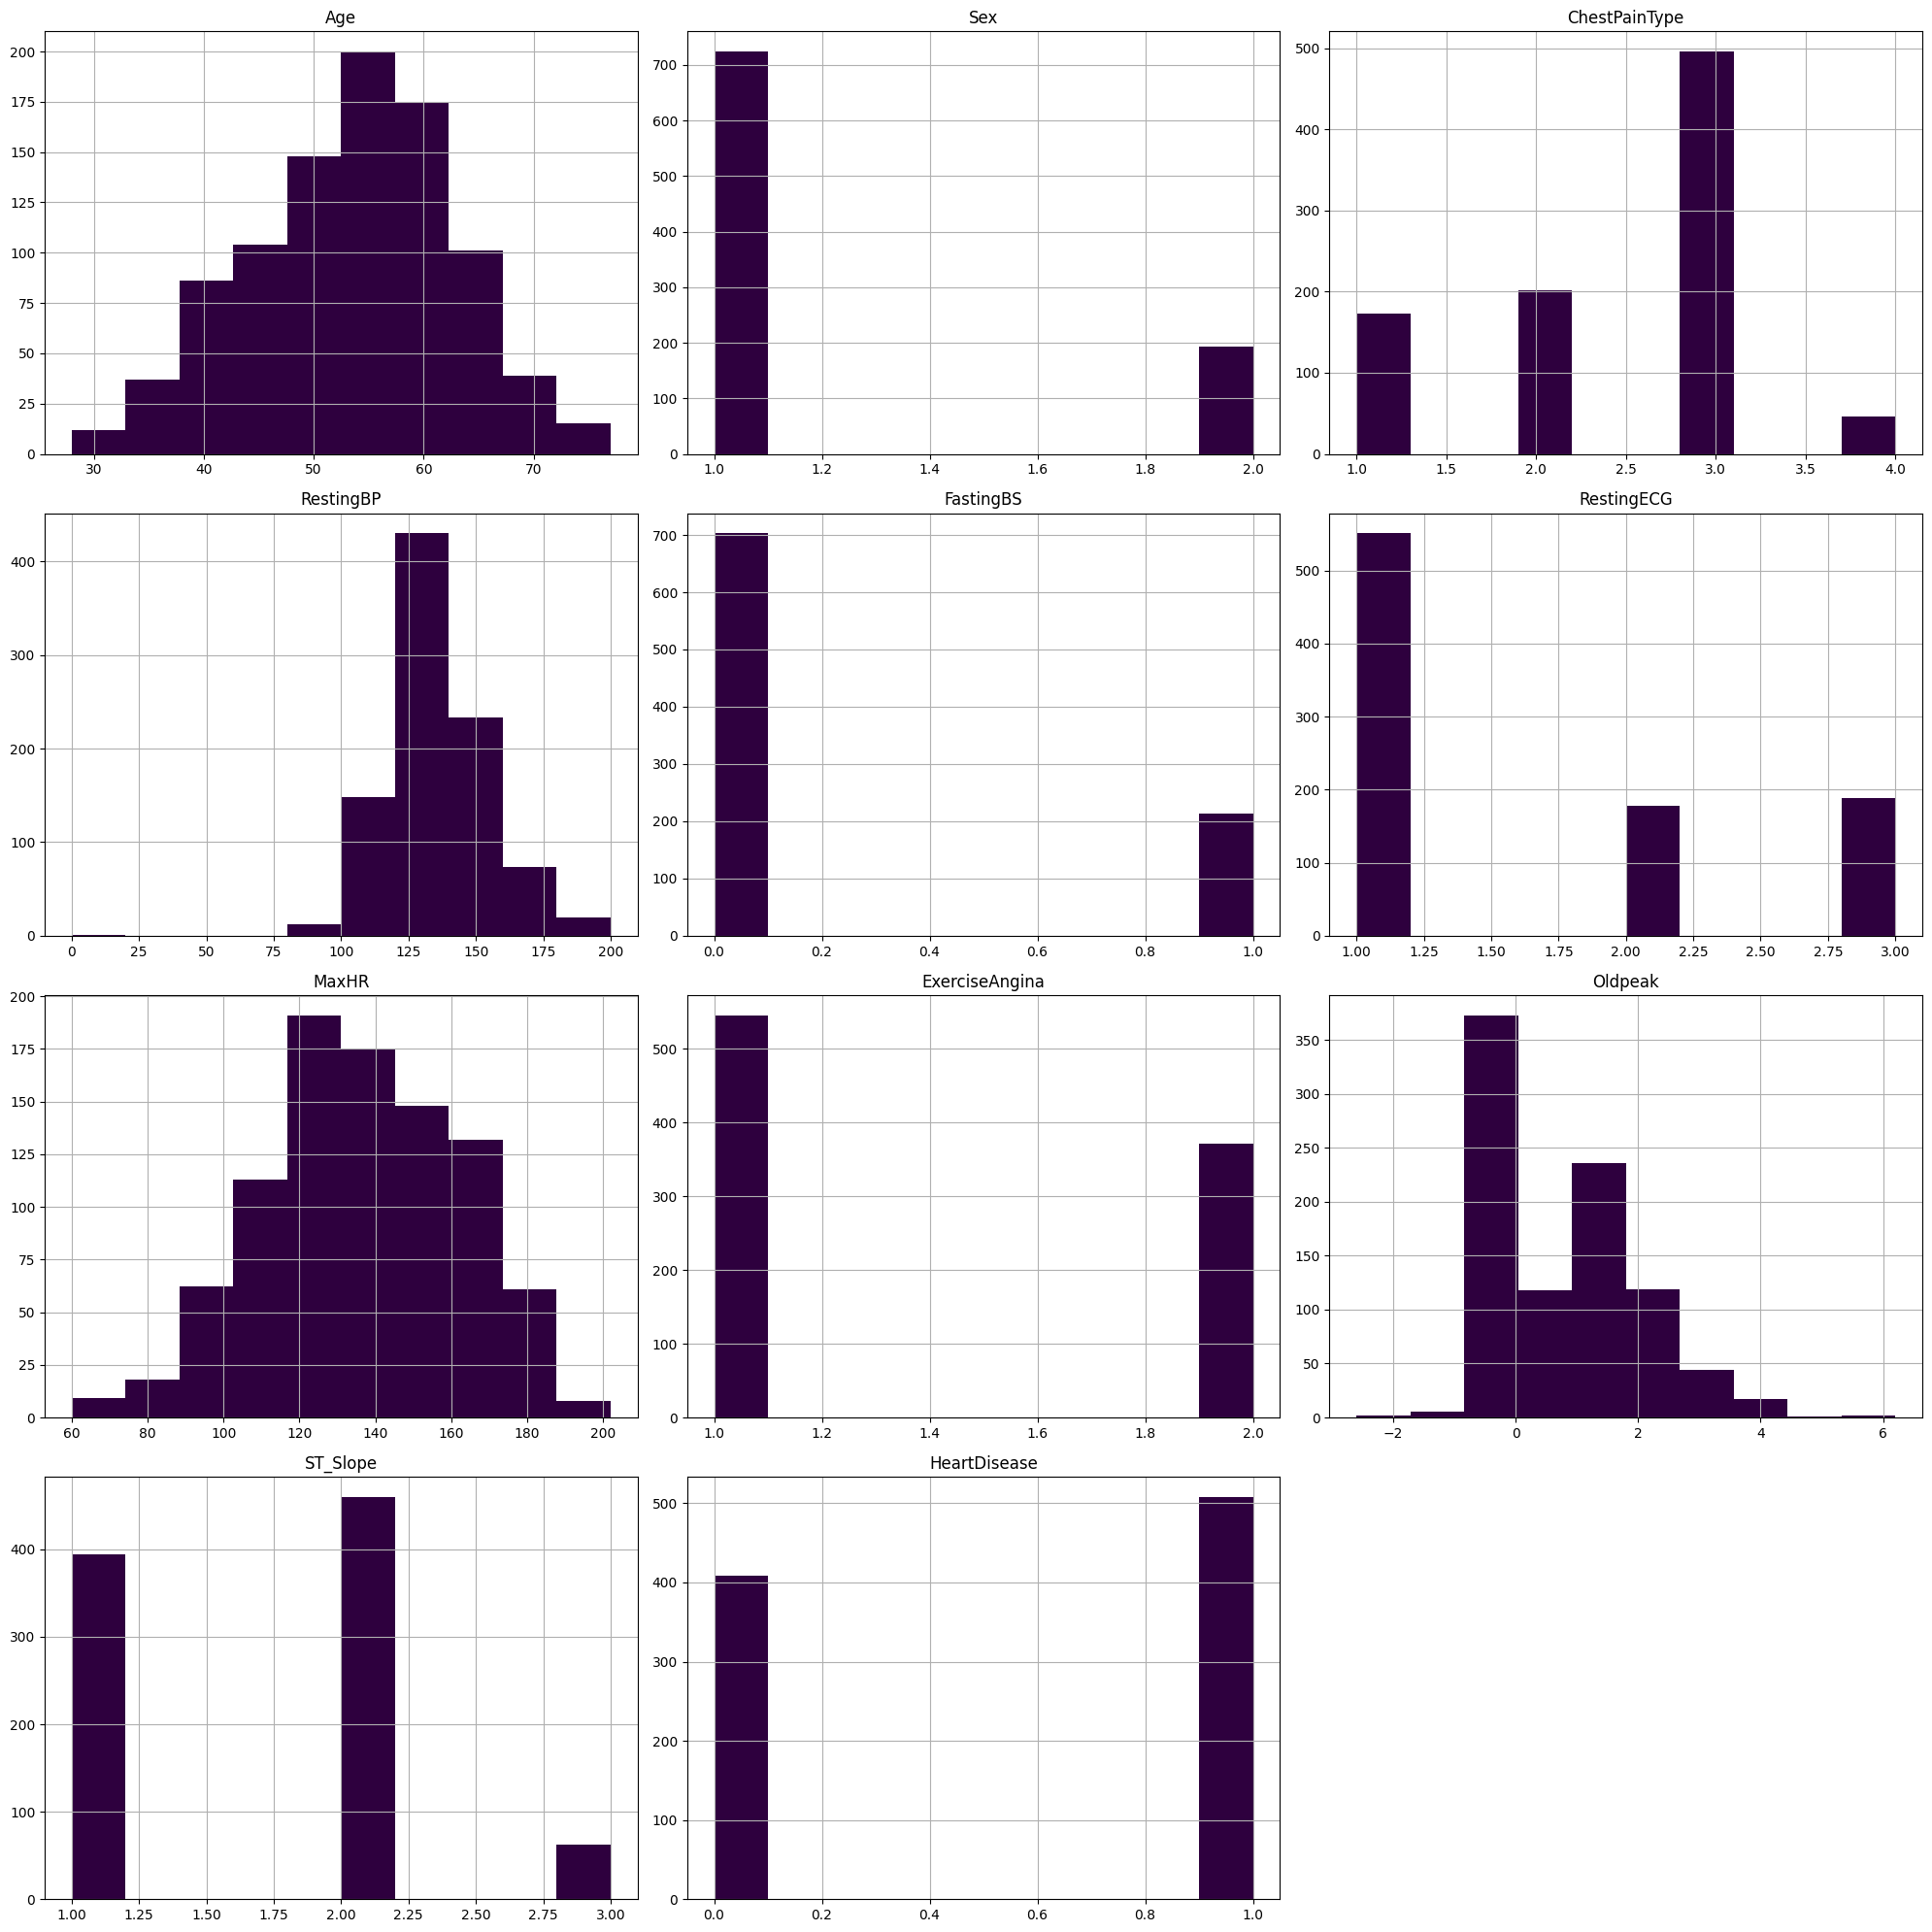

In [15]:
df.hist(figsize = (20,20),color='#2e003e')
plt.tight_layout()
plt.show()

In [16]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [17]:
df['HeartDisease'].value_counts()

1    508
0    409
Name: HeartDisease, dtype: int64

Pie chart to visualize the two categories

In [20]:
Hdislabel = ['Have heart disease','Do not have heart disease']
val_counts = [508,409] 
fig = px.pie(values=val_counts,names=Hdislabel,
             color=Hdislabel,
             color_discrete_map={'Have heart disease':'red',
                                 'Do not have heart disease':'#13F306'},
             title='Heart disease count')

fig.show()

In [21]:
HDis = 0
NotHDis = 0
for i in df['HeartDisease']:
    if i==0:
        NotHDis+= 1
    else:
        HDis+= 1
print(f"Percentage of people who do not have heart disease is {round(NotHDis/len(df['HeartDisease'])*100,2)}%")
print(f"Percentage of people who have heart disease is {round(HDis/len(df['HeartDisease'])*100,2)}%")

Percentage of people who do not have heart disease is 44.6%
Percentage of people who have heart disease is 55.4%


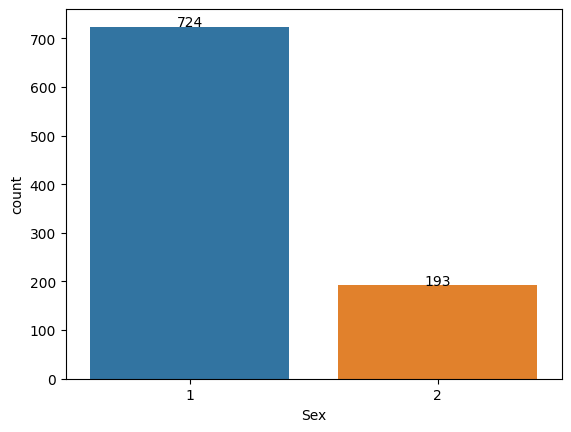

In [22]:
ax = sns.countplot(x="Sex", data=df)

# Add count labels to bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height+0.3,'{:.0f}'.format(height), ha="center")

In [23]:
# Number and percentage of male who are diagnosed to have heart disease

print(f"{len(df[(df['Sex']==1) & (df['HeartDisease']==1)])} male")
print(f"{round(len(df[(df['Sex']==1) & (df['HeartDisease']==1)])/len(df[df['Sex']==1])*100,2)}% of male are diagnosed to have heart disease among 724 male")

458 male
63.26% of male are diagnosed to have heart disease among 724 male


In [24]:
# Number and percentage of female who are diagnosed to have heart disease
print(f"{len(df[(df['Sex']==2) & (df['HeartDisease']==1)])} female")
print(f"{round(len(df[(df['Sex']==2) & (df['HeartDisease']==1)])/len(df[df['Sex']==2])*100,2)}% of male are diagnosed to have heart disease among 193 female")

50 female
25.91% of male are diagnosed to have heart disease among 193 female


<Figure size 2000x2000 with 0 Axes>

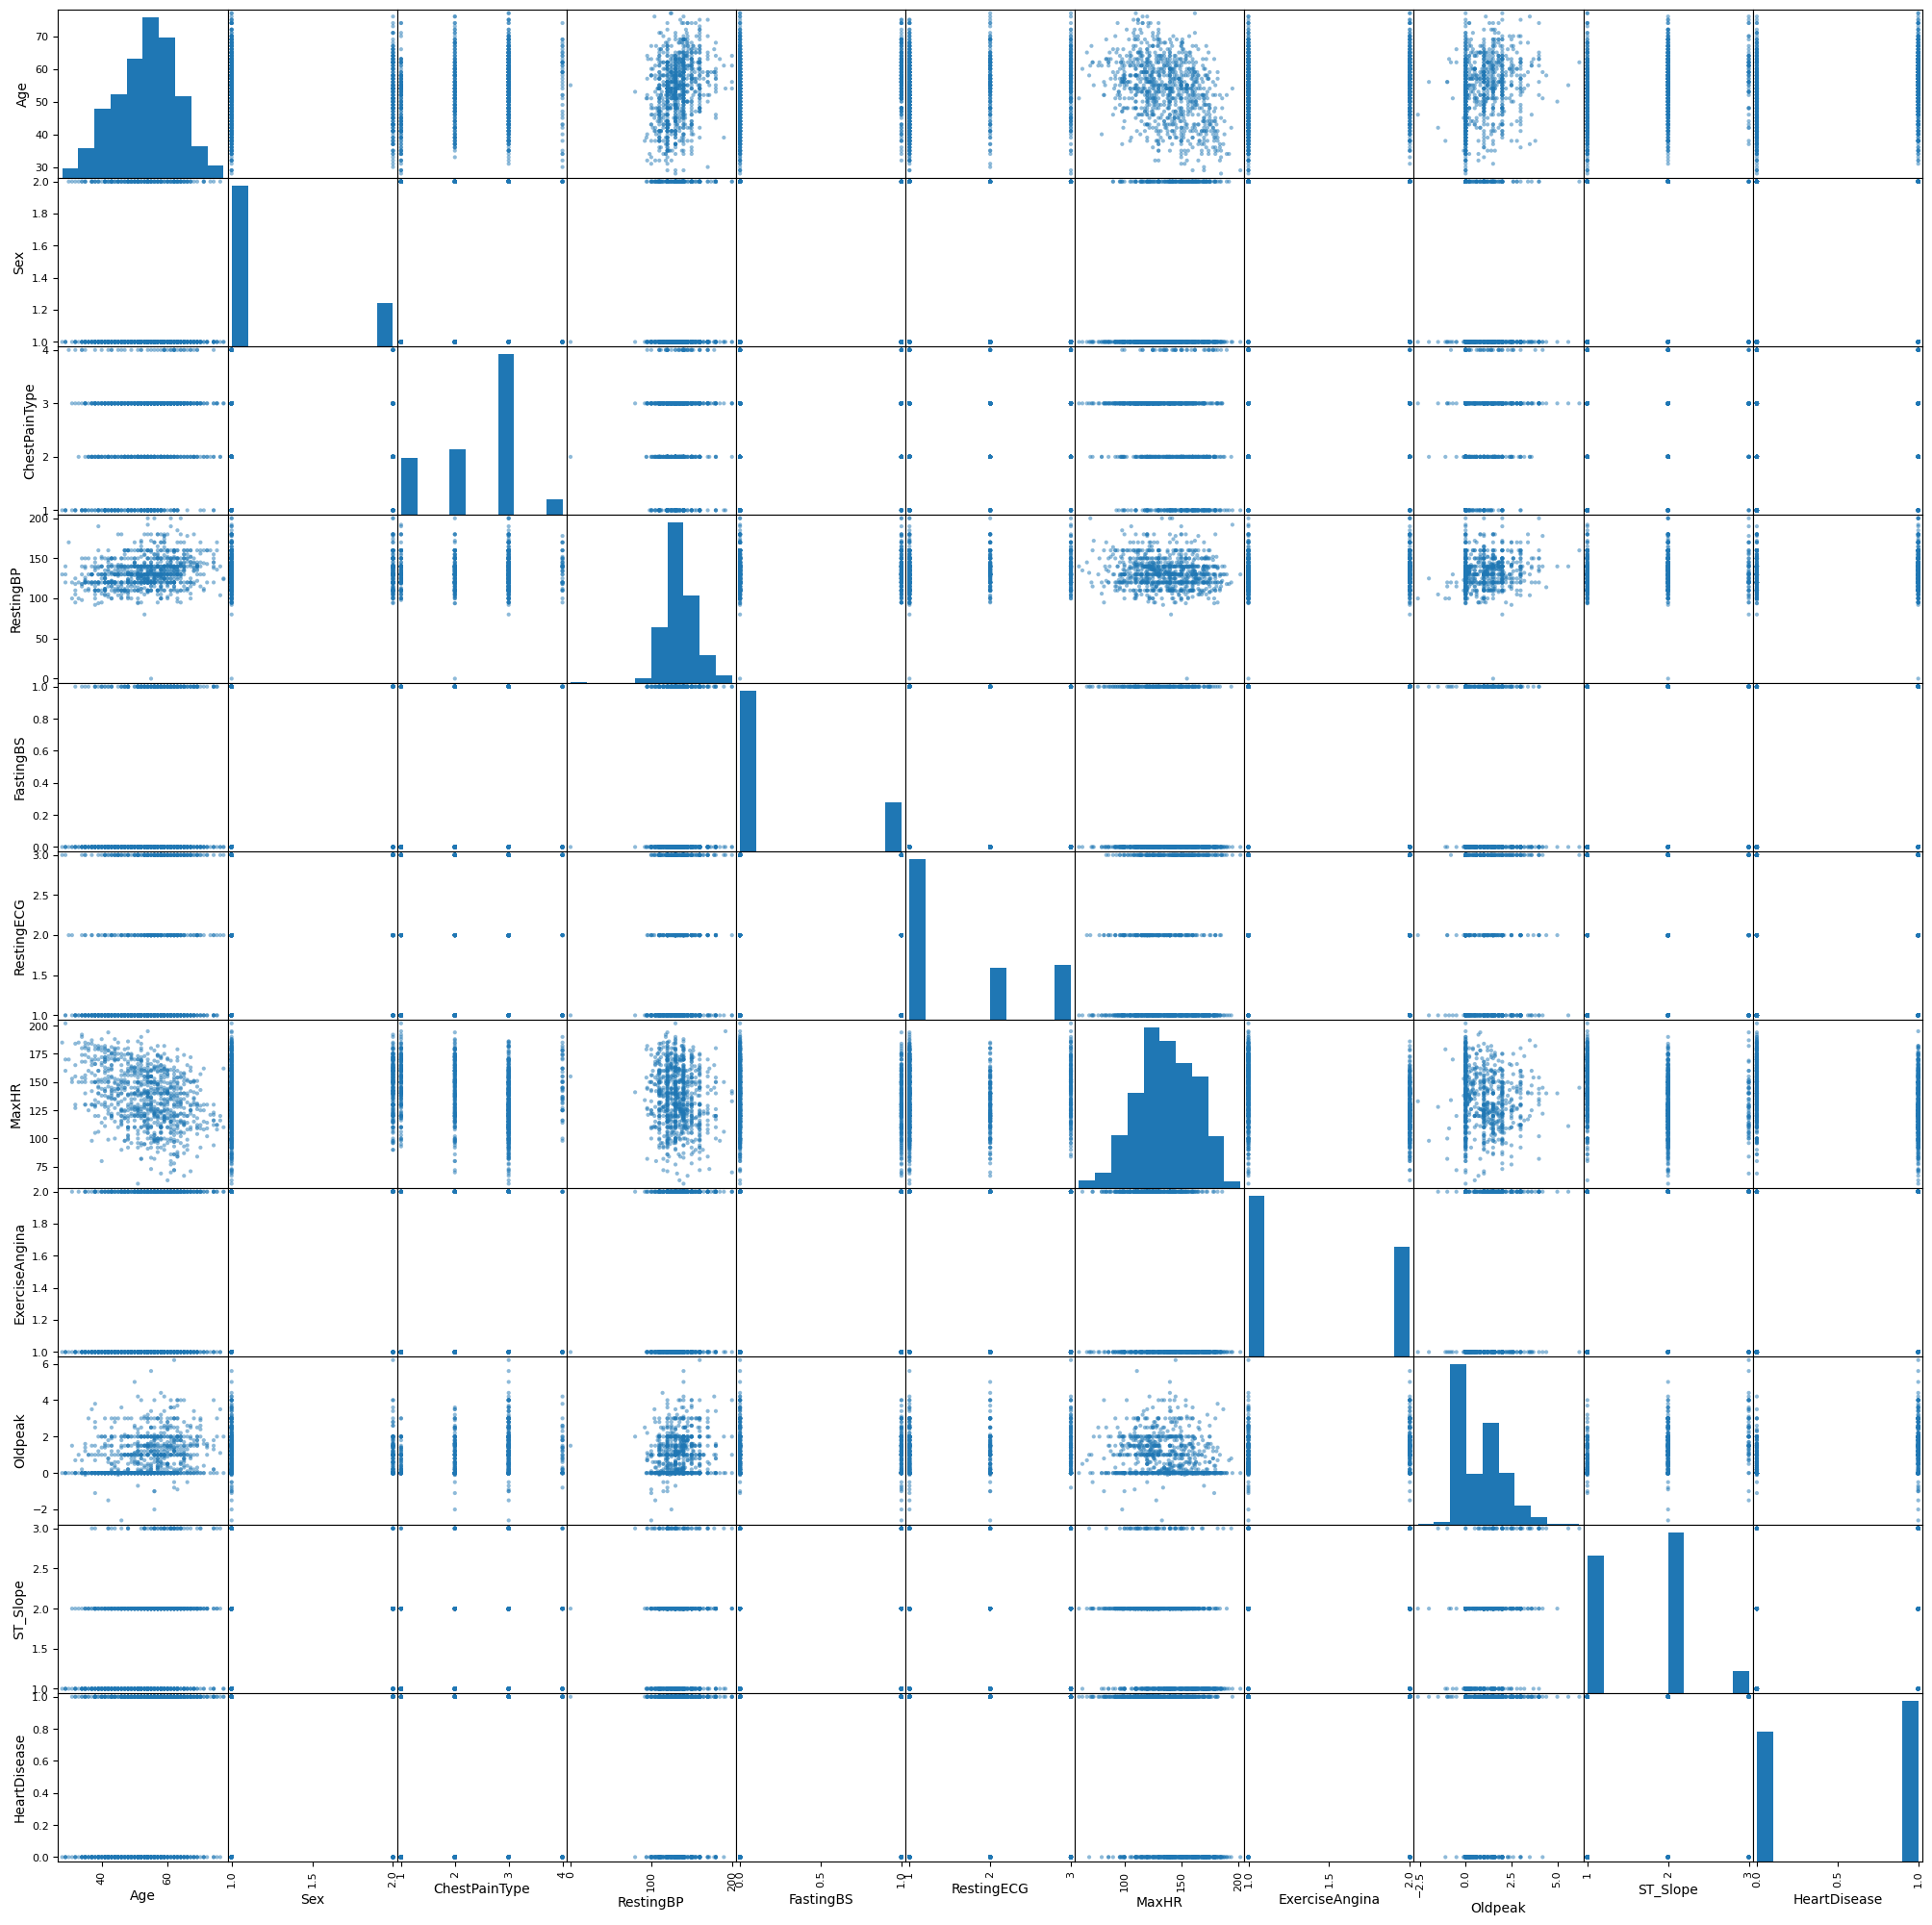

In [25]:
plt.figure(figsize=(20,20))
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25, 25))

Text(0.5, -0.23, 'Fig: Annoted values of correlation coefficient of each pair of features')

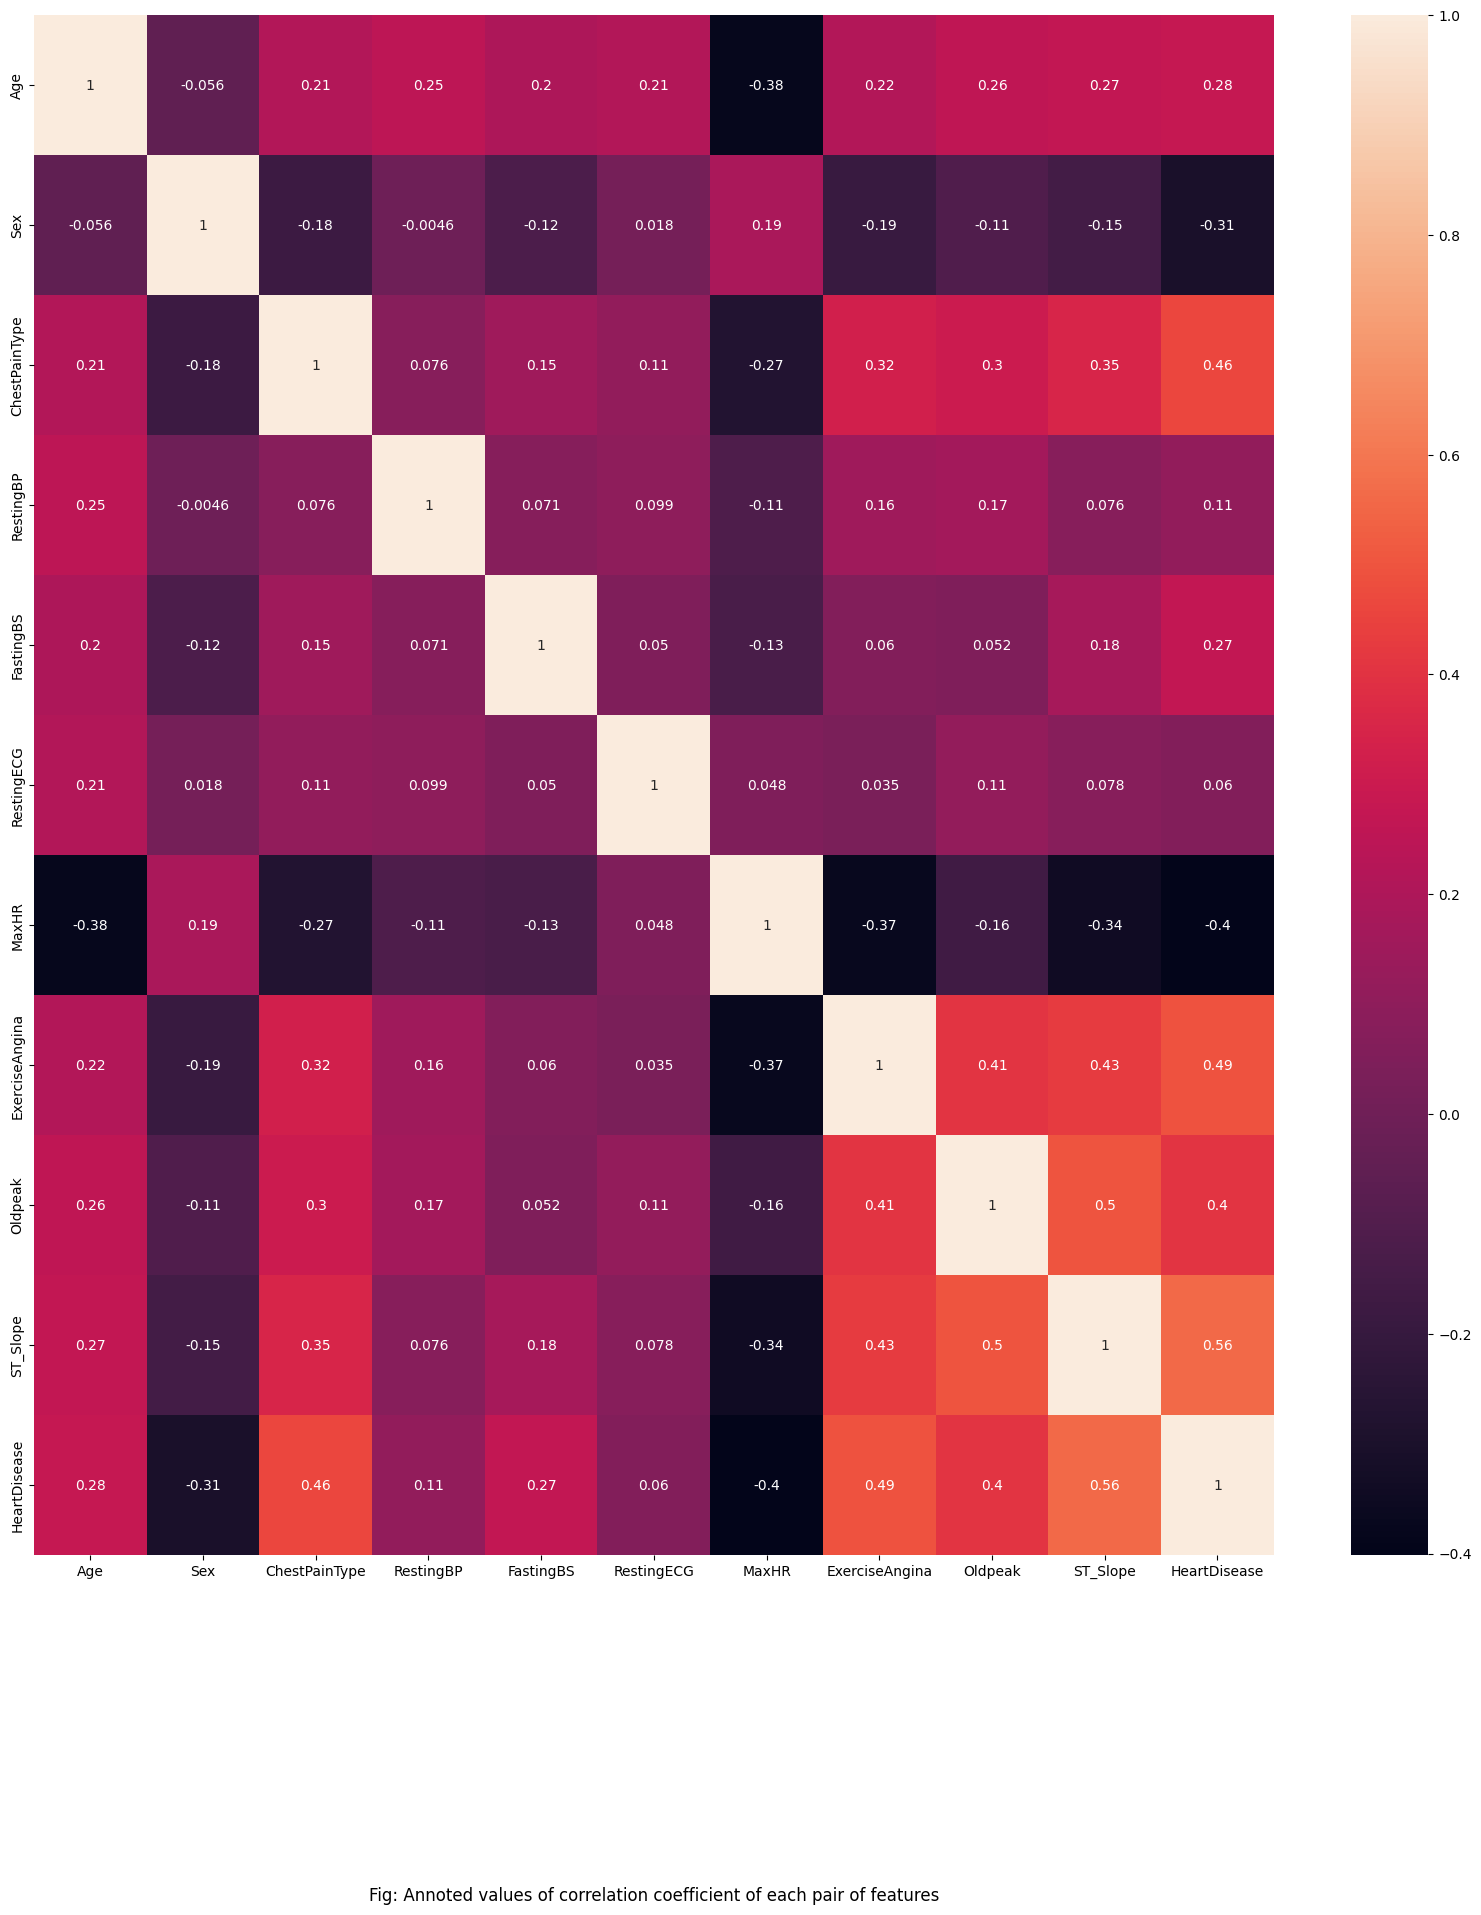

In [26]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(),annot=True)
plt.title('Fig: Annoted values of correlation coefficient of each pair of features', y=-0.23)

Visualizing according to the heart condition

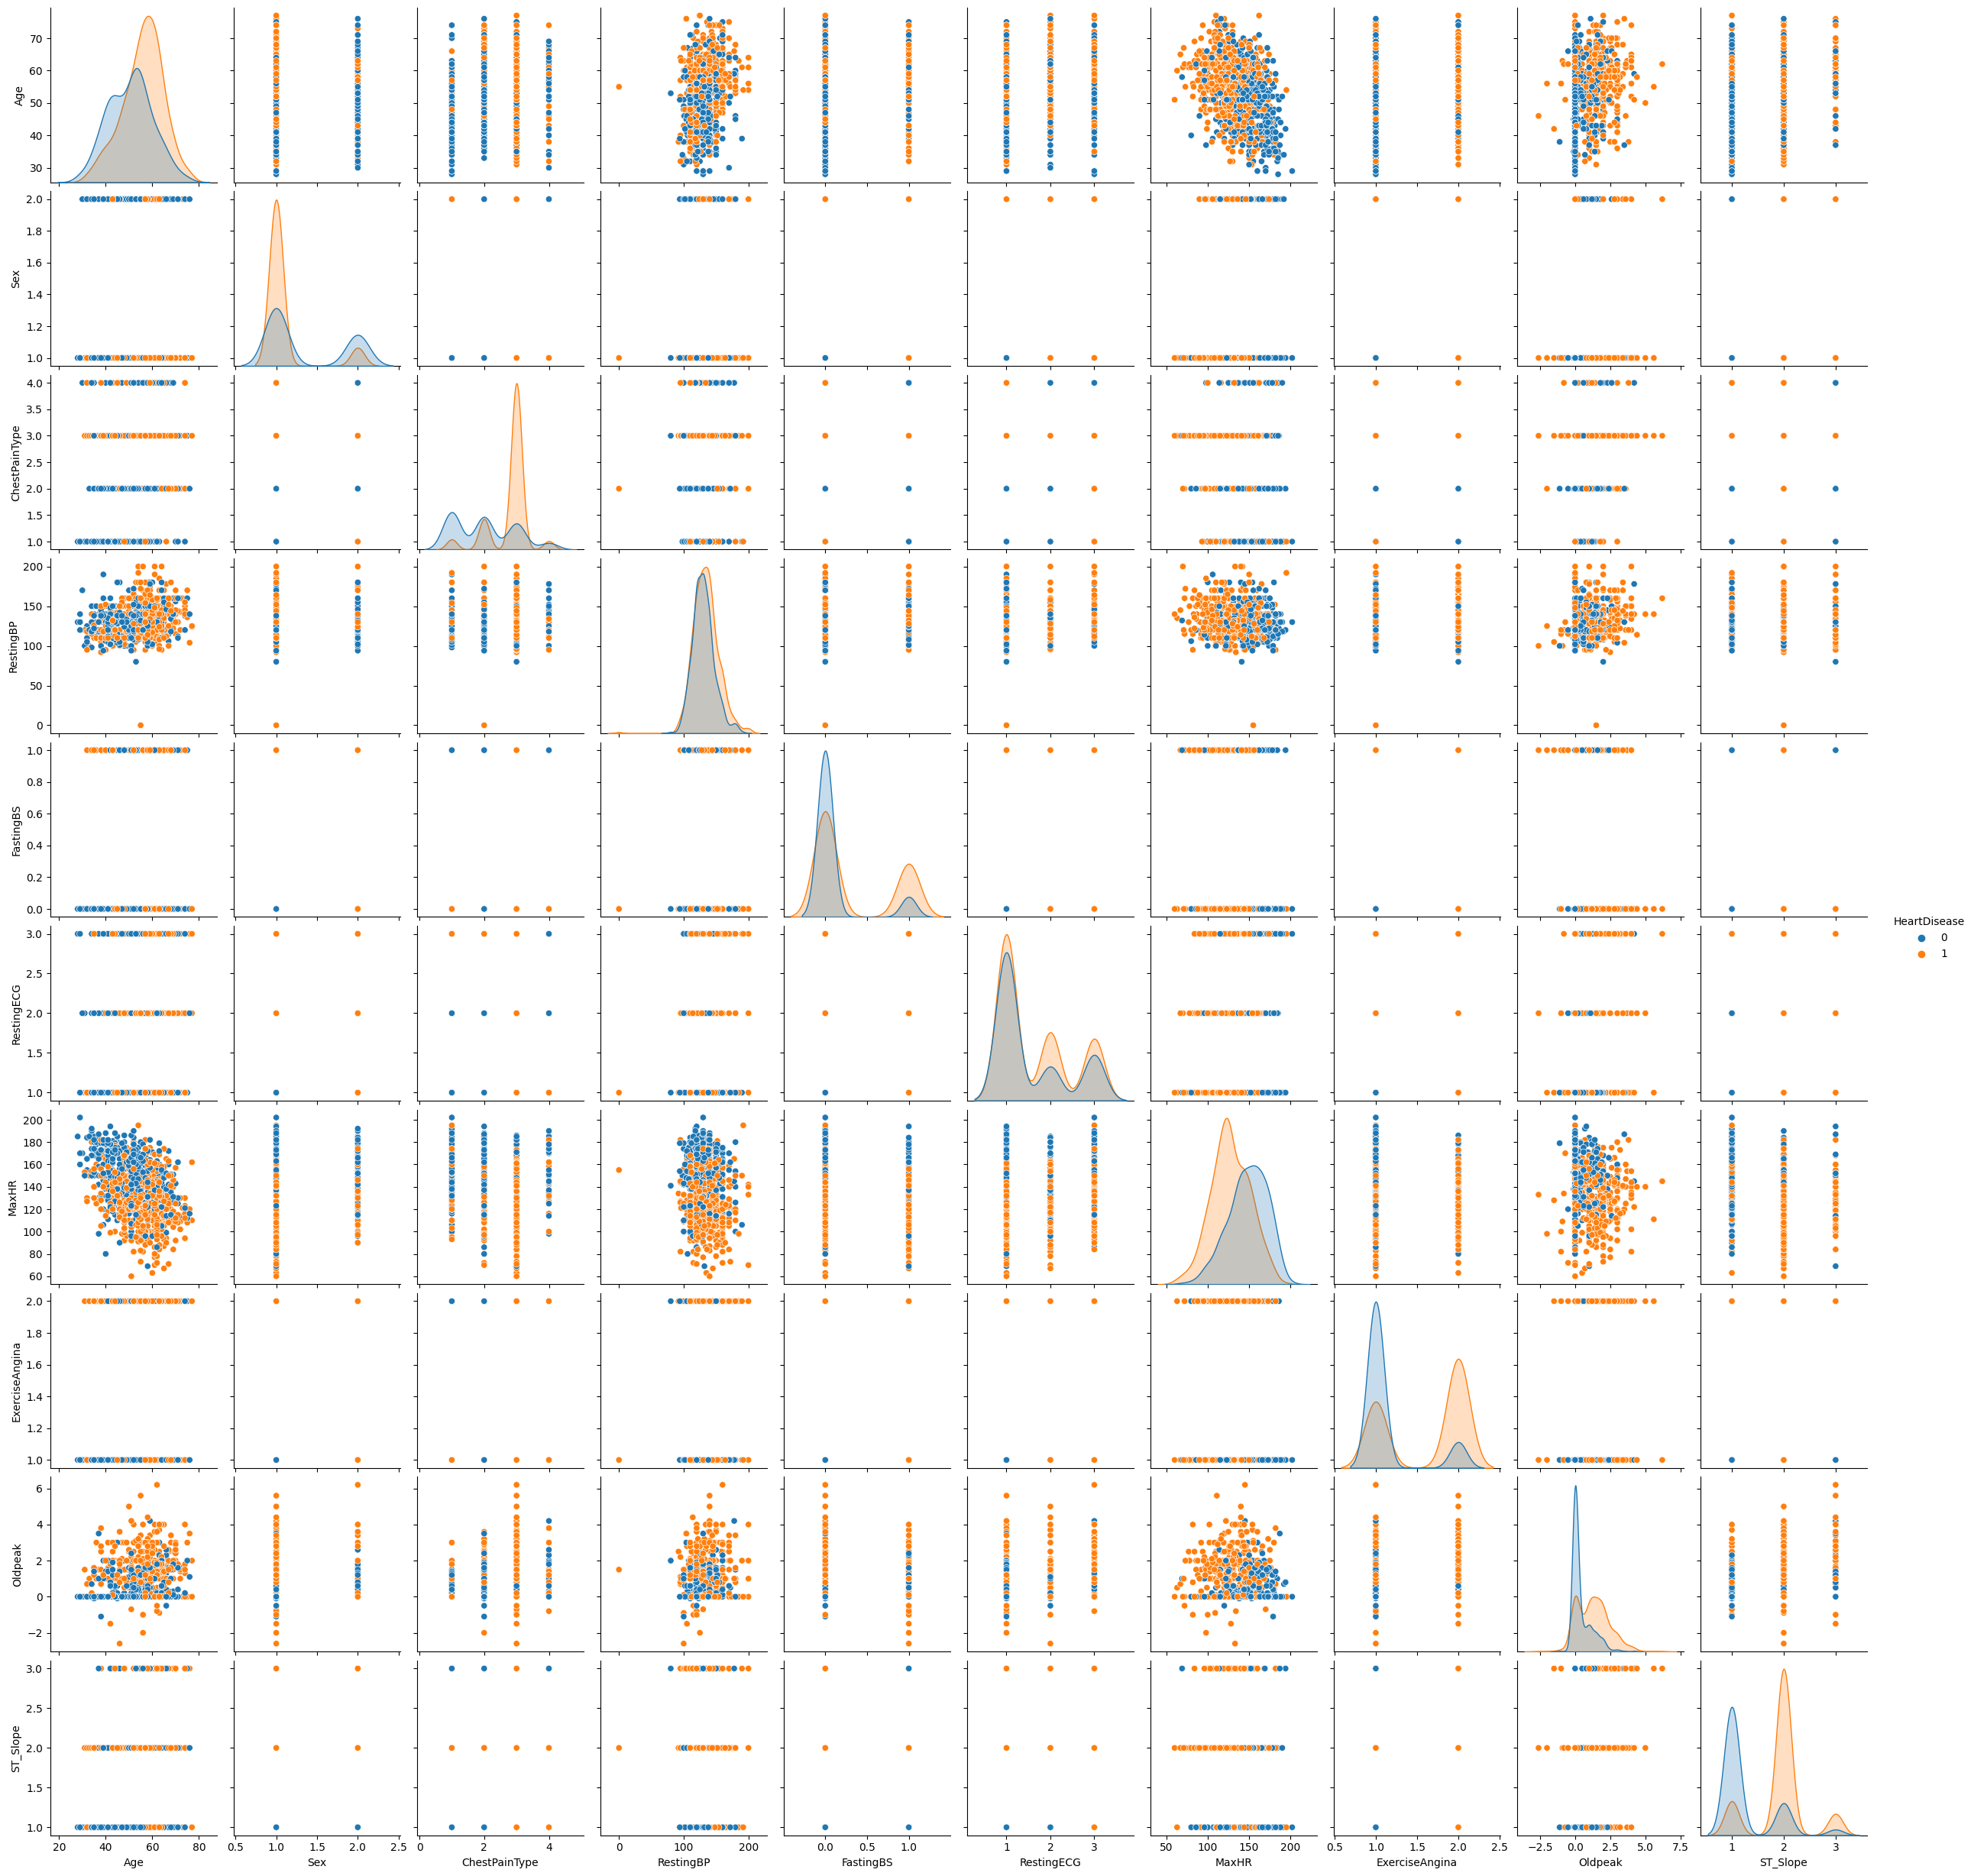

In [27]:
p=sns.pairplot(df, hue = 'HeartDisease')

In [28]:
X = df.drop('HeartDisease',axis=1)
Y = df['HeartDisease']

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(Y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(Y_test,classifier.predict(X_test)))

def model(classifier):
    
    classifier.fit(X_train,Y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(Y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,X_train,Y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(Y_test,prediction)))
    plot_roc_curve(classifier, X_test,Y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

Train test split

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=5)

Transforming the data for KNN

In [31]:
# At first we have to do standard scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)

In [32]:
X_train_knn.shape

(733, 10)

In [33]:
k = np.sqrt(X_train_knn.shape[0])
print('The value of k is',k)

The value of k is 27.073972741361768


Setting up the number of neighbour groups

In [35]:
k = 27

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)

In [37]:
knn.fit(X_train_knn,Y_train)

KNeighborsClassifier(n_neighbors=27)

In [38]:
Y_pred_knn = knn.predict(X_test_knn)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred_knn)

0.8695652173913043

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred_knn)

array([[67, 15],
       [ 9, 93]], dtype=int64)

[0.8586956521739131, 0.8315217391304348, 0.8695652173913043, 0.875, 0.875, 0.8804347826086957, 0.8858695652173914, 0.8695652173913043, 0.875, 0.8586956521739131, 0.875, 0.875, 0.8858695652173914, 0.875, 0.8858695652173914, 0.875, 0.8804347826086957, 0.875, 0.875, 0.8641304347826086, 0.875, 0.8695652173913043, 0.8858695652173914, 0.8804347826086957, 0.8858695652173914, 0.8695652173913043, 0.8695652173913043, 0.8532608695652174, 0.8641304347826086, 0.8641304347826086]


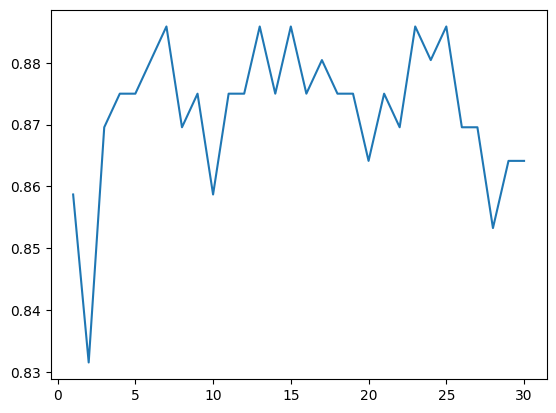

In [41]:
accuracy = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_knn,Y_train)
    accuracy.append(accuracy_score(Y_test,knn.predict(X_test_knn)))
    
plt.plot(range(1,31),accuracy)
print(accuracy)

              precision    recall  f1-score   support

           0       0.47      0.99      0.63        82
           1       0.90      0.09      0.16       102

    accuracy                           0.49       184
   macro avg       0.68      0.54      0.40       184
weighted avg       0.71      0.49      0.37       184



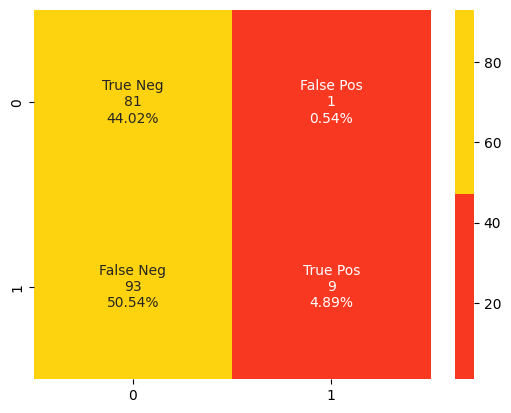

In [42]:
model_evaluation(knn)

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [44]:
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [45]:
Y_pred_logistic = log_reg.predict(X_test)

In [46]:
print('The accuracy score is ',accuracy_score(Y_test,Y_pred_logistic))

The accuracy score is  0.8695652173913043


[0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043]


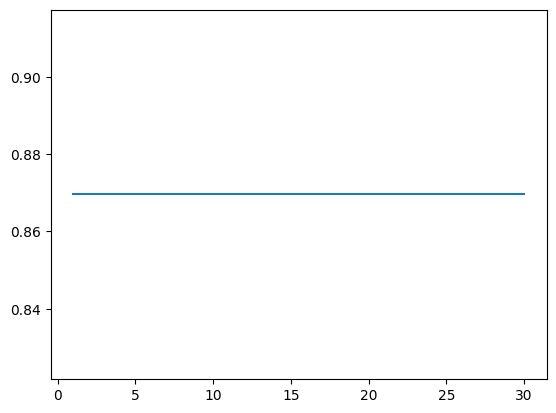

In [47]:
accuracy = []
for i in range(1,31):
    log_reg = LogisticRegression()
    log_reg.fit(X_train,Y_train)
    accuracy.append(accuracy_score(Y_test,log_reg.predict(X_test)))
    
plt.plot(range(1,31),accuracy)
print(accuracy)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        82
           1       0.87      0.90      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



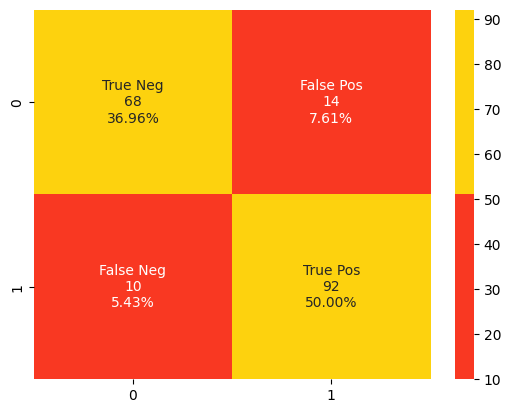

In [48]:
model_evaluation(log_reg)

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
gaussNB = GaussianNB()

In [51]:
gaussNB.fit(X_train,Y_train)

GaussianNB()

In [52]:
Y_pred_nb = gaussNB.predict(X_test)

In [53]:
print('The value of accuracy score is ',accuracy_score(Y_test,Y_pred_nb))

The value of accuracy score is  0.8586956521739131


[0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131, 0.8586956521739131]


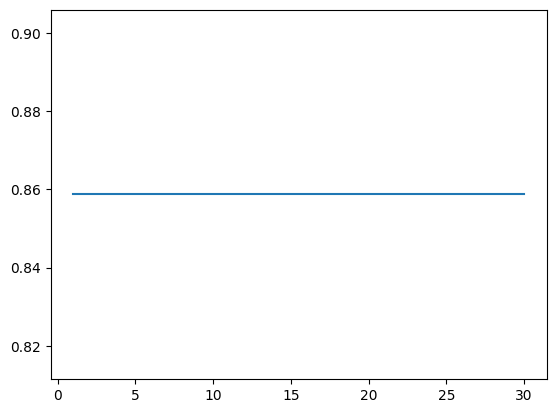

In [54]:
accuracy = []
for i in range(1,31):
    gaussNB = GaussianNB()
    gaussNB.fit(X_train,Y_train)
    accuracy.append(accuracy_score(Y_test,gaussNB.predict(X_test)))
    
plt.plot(range(1,31),accuracy)
print(accuracy)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        82
           1       0.88      0.86      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



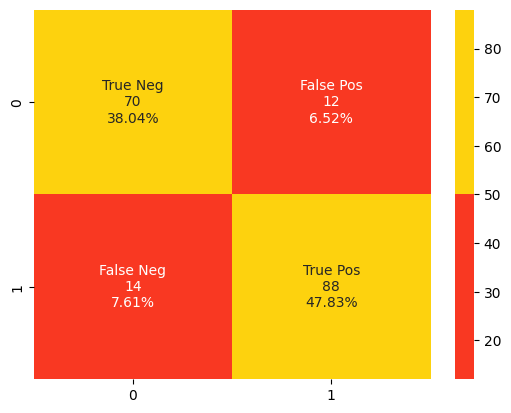

In [55]:
model_evaluation(gaussNB)

In [56]:
from sklearn.svm import SVC

In [57]:
svcClass = SVC()

In [58]:
svcClass.fit(X_train, Y_train)

SVC()

In [59]:
Y_pred_svc = svcClass.predict(X_test)

In [60]:
print('The value of accuracy score is ',accuracy_score(Y_test,Y_pred_svc))

The value of accuracy score is  0.6630434782608695


[0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695, 0.6630434782608695]


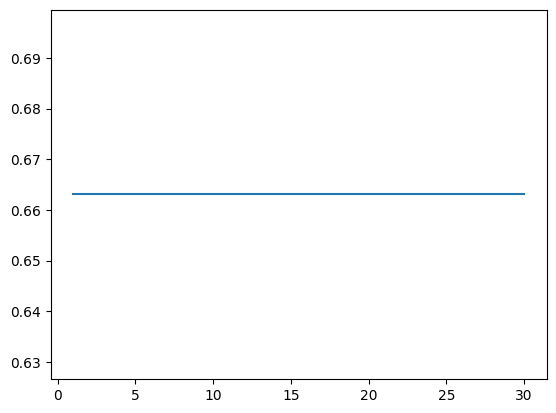

In [61]:
accuracy = []
for i in range(1,31):
    svcClass = SVC()
    svcClass.fit(X_train,Y_train)
    accuracy.append(accuracy_score(Y_test,svcClass.predict(X_test)))
    
plt.plot(range(1,31),accuracy)
print(accuracy)

              precision    recall  f1-score   support

           0       0.64      0.56      0.60        82
           1       0.68      0.75      0.71       102

    accuracy                           0.66       184
   macro avg       0.66      0.65      0.65       184
weighted avg       0.66      0.66      0.66       184



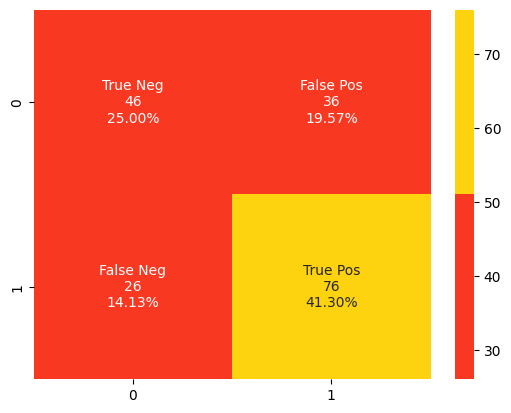

In [62]:
model_evaluation(svcClass)

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtc = DecisionTreeClassifier()

In [65]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [66]:
Y_pred_dtc = dtc.predict(X_test)

In [67]:
print('The value of accuracy score is ',accuracy_score(Y_test,Y_pred_svc))

The value of accuracy score is  0.6630434782608695


[0.7336956521739131, 0.7554347826086957, 0.7445652173913043, 0.7663043478260869, 0.7663043478260869, 0.7608695652173914, 0.7608695652173914, 0.7336956521739131, 0.7445652173913043, 0.7119565217391305, 0.7391304347826086, 0.7554347826086957, 0.7336956521739131, 0.7554347826086957, 0.7771739130434783, 0.7391304347826086, 0.7554347826086957, 0.7445652173913043, 0.7663043478260869, 0.7608695652173914, 0.7282608695652174, 0.7663043478260869, 0.7717391304347826, 0.7554347826086957, 0.7608695652173914, 0.7554347826086957, 0.7282608695652174, 0.7445652173913043, 0.7336956521739131, 0.7554347826086957]


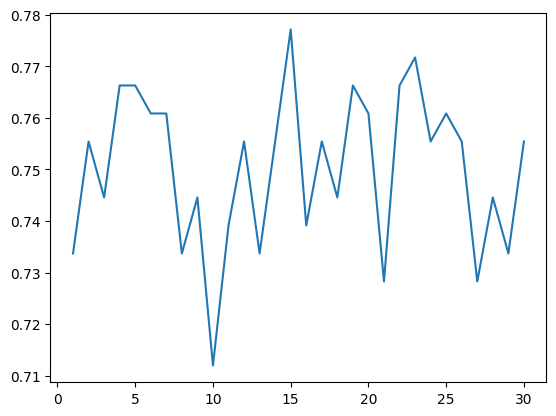

In [68]:
accuracy = []
for i in range(1,31):
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train,Y_train)
    accuracy.append(accuracy_score(Y_test,dtc.predict(X_test)))
    
plt.plot(range(1,31),accuracy)
print(accuracy)

              precision    recall  f1-score   support

           0       0.73      0.72      0.72        82
           1       0.78      0.78      0.78       102

    accuracy                           0.76       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.76      0.76      0.76       184



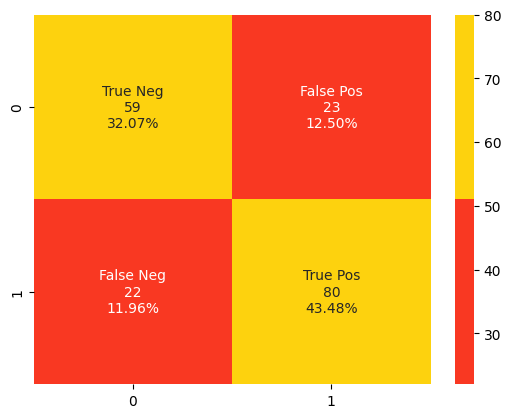

In [69]:
model_evaluation(dtc)

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier()

In [72]:
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [73]:
Y_pred_rfc = rfc.predict(X_test)

In [74]:
print('The value of accuracy score is ',accuracy_score(Y_test,Y_pred_svc))

The value of accuracy score is  0.6630434782608695


In [75]:
accuracy = []
for i in range(1,31):
    rfc = RandomForestClassifier()
    rfc.fit(X_train,Y_train)
    accuracy.append(accuracy_score(Y_test,rfc.predict(X_test)))
    
plt.plot(range(1,31),accuracy)
print(accuracy)

In [ ]:
model_evaluation(rfc)